# Preamble

In [1]:
import numpy as np
import gridworld
import agent

In [2]:
np.random.seed(1)

In [3]:
start_coords = (126,3)
goal_coords  = (135,143)

# Training

In [4]:
N_EPISODES = 6000
STOP_BY_10 = False
LOAD_QTABLE = False

DISCOUNT_FACTOR = 0.99
LEARNING_RATE = 0.99
EPSILON = 0.0

In [5]:
## INITIALIZE ENVIROMENT
env = gridworld.Enviroment(save_transition_array  =True, 
                           start_coords = start_coords, 
                           goal_coords = goal_coords)

## INITIALIZE AGENT
grid_agent = agent.Agent(env, 
                         epsilon = EPSILON, 
                         discount_factor = DISCOUNT_FACTOR, 
                         learning_rate = LEARNING_RATE)

## ALTERNATIVELY LOAD STORED QTABLE
if LOAD_QTABLE: grid_agent.load_qtable()

## TRAINING
last5routes, first_finding = agent.train_qlearning(grid_agent, 
                                                   env, 
                                                   nepisodes = N_EPISODES, 
                                                   stop_by_10 = STOP_BY_10)

## SAVE QTABLE FOR TESTING
grid_agent.save_qtable()

print('\nFirst finding: ',first_finding)
print(' *** DONE *** ')

 -- Initialization
 -- Start: (126, 3)
 --  Goal: (135, 143)
 -- Grid world dimensions = (246, 150)
 -- Number of non-terminal states: 10344
 -- End of initialization
Episode   5900:    240 moves, total_reward =  -237.0, final_reward =     1.0
First finding:  3337
 *** DONE *** 


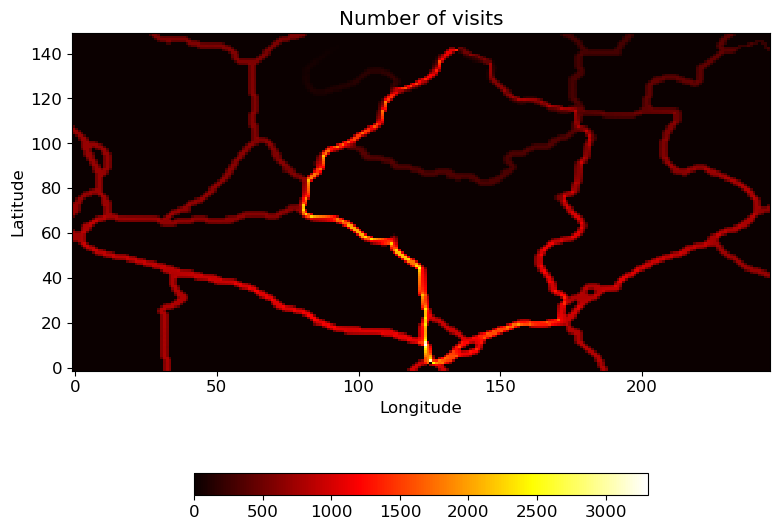

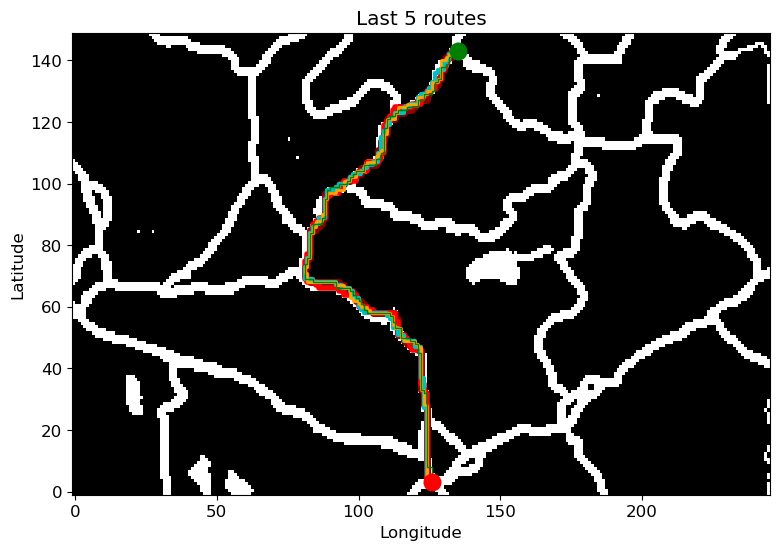

In [6]:
env.plot_nvisits()
env.plot_final_path(last5routes)

# Testing

In [7]:
## INITIALIZE ENVIROMENT
env = gridworld.Enviroment(load_transition_array = True, 
                           start_coords = start_coords, 
                           goal_coords = goal_coords)

## INITIALIZE AGENT
grid_agent = agent.Agent(env)

## LOAD QTABLE
grid_agent.load_qtable()

## SET START COORDINATES AND STATE
env.start_coords = start_coords
env.start_state = env.grid2state(start_coords)

## TESTING -> no Q-table updates
test_track = agent.test_qlearning(grid_agent, env)


 -- Initialization
 -- Start: (126, 3)
 --  Goal: (135, 143)
 -- Grid world dimensions = (246, 150)
 -- Number of non-terminal states: 10344
(36900, 4, 3)
 -- End of initialization


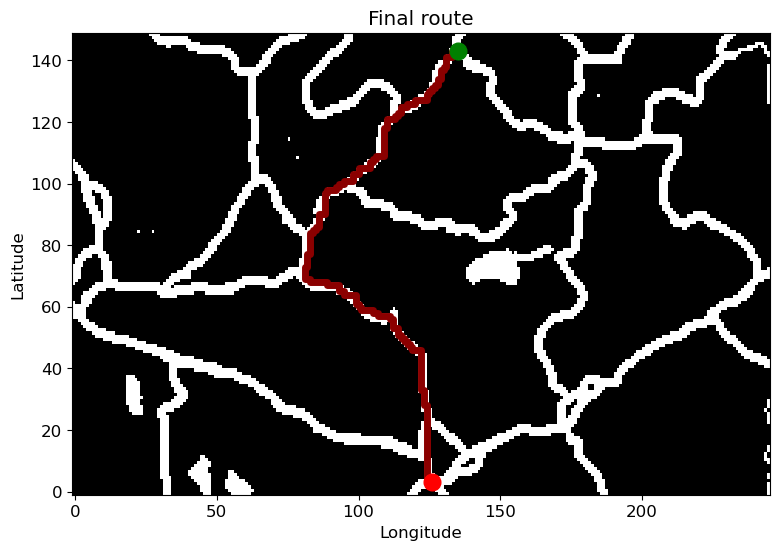

In [10]:
env.plot_final_path([test_track])

For comparison, see:
https://www.google.com/maps/dir/Sankt+Michael+In+Obersteiermark/Lunz+am+See/@47.6036724,14.5587796,10z/data=!3m1!4b1!4m14!4m13!1m5!1m1!1s0x4771dc0da64ec663:0x934977037ccee3f8!2m2!1d15.018174!2d47.336529!1m5!1m1!1s0x47721840430256db:0x532fecf3b8b4058d!2m2!1d15.0305202!2d47.8598408!3e0?entry=ttu